In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

X = boston.data
y = boston.target

df_boston = pd.DataFrame(X)
df_boston.columns = boston.feature_names
df_boston["MEDV"] = y
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
print(boston.DESCR) #查看数据集的描述信息

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
#最大最小标准化
def linear_scale(series):
    min_val = series.min()
    max_val = series.max()
    scale = max_val - min_val
    return series.apply(lambda x: ((x - min_val) / scale))


In [4]:
#对每个特征进行标准化处理
def normalize_linear_scale(examples_dataframe):
    processed_features = pd.DataFrame()
    for feature in boston.feature_names:
        processed_features[feature] = linear_scale(examples_dataframe[feature])
    processed_features["MEDV"] = linear_scale(examples_dataframe["MEDV"])
    return processed_features


In [5]:
normalized_df_boston = normalize_linear_scale((df_boston))
normalized_df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [6]:
#分离数据集
from sklearn.model_selection import train_test_split
features=normalized_df_boston[normalized_df_boston.loc[:,normalized_df_boston.columns!='MEDV'].columns]
target = normalized_df_boston['MEDV']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=33)


In [7]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)


In [8]:
# RMSE是预测值与真实值的误差平方根的均值
import math
from sklearn import metrics
math.sqrt(metrics.mean_squared_error(y_test, y_pred))


0.1060176631836513

In [13]:
metrics.mean_absolute_error(y_test,y_pred)

0.076324635523346548

In [10]:
help(metrics)

Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics

DESCRIPTION
    The :mod:`sklearn.metrics` module includes score functions, performance metrics
    and pairwise metrics and distance computations.

PACKAGE CONTENTS
    base
    classification
    cluster (package)
    pairwise
    pairwise_fast
    ranking
    regression
    scorer
    setup
    tests (package)

FUNCTIONS
    accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
        Accuracy classification score.
        
        In multilabel classification, this function computes subset accuracy:
        the set of labels predicted for a sample must *exactly* match the
        corresponding set of labels in y_true.
        
        Read more in the :ref:`User Guide <accuracy_score>`.
        
        Parameters
        ----------
        y_true : 1d array-like, or label indicator array / sparse matrix
            Ground truth (correct) labels.
        
        y_pred : 1d array-like, or label in

In [10]:
y_test.shape

(152,)

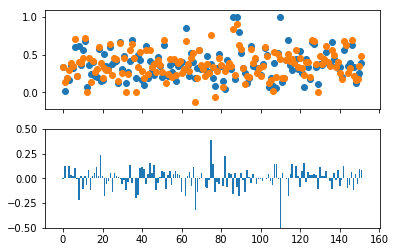

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(2,sharex="col")
x=range(len(x_test))
ax[0].scatter(x,y_test)
ax[0].scatter(x,y_pred)

ax[1].bar(x,y_pred-y_test)
ax[1].set_ylim([-0.5,0.5])
plt.show()


In [32]:
y_test.shape

(152,)

In [33]:
y_pred.shape

(152,)

In [36]:
y_err=y_test-y_pred

In [37]:
for y in y_err:
    if y>0:
        print("red")
    else:
        print("green")

red
green
green
green
green
green
green
red
red
green
red
green
red
green
red
green
green
green
green
green
green
red
red
red
green
red
green
green
green
red
red
red
red
red
green
red
green
red
red
green
green
green
red
green
green
green
green
red
red
green
green
green
red
green
green
red
green
green
green
green
red
green
red
green
green
red
green
red
red
red
green
green
red
red
red
green
green
red
red
red
green
red
green
red
green
green
red
green
red
red
green
red
red
green
green
red
green
green
red
red
red
red
green
red
green
red
red
green
green
red
red
green
green
red
red
green
green
green
green
green
red
green
green
red
green
green
green
green
green
red
green
green
green
green
green
red
red
green
red
green
red
red
green
green
red
red
green
red
green
red
green
green
